<a href="https://colab.research.google.com/github/fleitasjg/Alura-Challenge-2-Telecom-X/blob/main/Alura_Challenge_2_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom X - Análisis de Evasión de Clientes
## 1. Cargar los datos directamente desde la API utilizando Python.
## 2. Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [977]:
import pandas as pd
import requests

# URL de los datos
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/5adf5f2f87a72bd8b2e854db16e2f2f7c499081a/TelecomX_Data.json"

# Obtener los datos
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Cargar los datos en un DataFrame
    data = pd.read_json(response.text)
    print("Datos cargados exitosamente.")
else:
    print("Error al cargar los datos:", response.status_code)

# Mostrar las primeras filas del DataFrame
print(data.head())


Datos cargados exitosamente.
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber opt

/tmp/ipython-input-977-1738080814.py:13: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_json(response.text)


##  Explorar las columnas del dataset y verificar sus tipos de datos.
### 3. Consultar el diccionario para comprender mejor el significado de las variables.
### 4. Identificar las columnas más relevantes para el análisis de evasión.

In [978]:
# Verificar las columnas y sus tipos de datos
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [979]:
# Diccionario de datos
data_dictionary = {
    "customerID": "Número de identificación único de cada cliente",
    "Churn": "Si el cliente dejó o no la empresa",
    "gender": "Género (masculino y femenino)",
    "SeniorCitizen": "Información sobre si un cliente tiene o no una edad igual o mayor a 65 años",
    "Partner": "Si el cliente tiene o no una pareja",
    "Dependents": "Si el cliente tiene o no dependientes",
    "tenure": "Meses de contrato del cliente",
    "PhoneService": "Suscripción al servicio telefónico",
    "MultipleLines": "Suscripción a más de una línea telefónica",
    "InternetService": "Suscripción a un proveedor de internet",
    "OnlineSecurity": "Suscripción adicional de seguridad en línea",
    "OnlineBackup": "Suscripción adicional de respaldo en línea",
    "DeviceProtection": "Suscripción adicional de protección del dispositivo",
    "TechSupport": "Suscripción adicional de soporte técnico, menor tiempo de espera",
    "StreamingTV": "Suscripción de televisión por cable",
    "StreamingMovies": "Suscripción de streaming de películas",
    "Contract": "Tipo de contrato",
    "PaperlessBilling": "Si el cliente prefiere recibir la factura en línea",
    "PaymentMethod": "Forma de pago",
    "Charges.Monthly": "Total de todos los servicios del cliente por mes",
    "Charges.Total": "Total gastado por el cliente"
}

# Mostrar el diccionario de datos
for key, value in data_dictionary.items():
    print(f"{key}: {value}")


customerID: Número de identificación único de cada cliente
Churn: Si el cliente dejó o no la empresa
gender: Género (masculino y femenino)
SeniorCitizen: Información sobre si un cliente tiene o no una edad igual o mayor a 65 años
Partner: Si el cliente tiene o no una pareja
Dependents: Si el cliente tiene o no dependientes
tenure: Meses de contrato del cliente
PhoneService: Suscripción al servicio telefónico
MultipleLines: Suscripción a más de una línea telefónica
InternetService: Suscripción a un proveedor de internet
OnlineSecurity: Suscripción adicional de seguridad en línea
OnlineBackup: Suscripción adicional de respaldo en línea
DeviceProtection: Suscripción adicional de protección del dispositivo
TechSupport: Suscripción adicional de soporte técnico, menor tiempo de espera
StreamingTV: Suscripción de televisión por cable
StreamingMovies: Suscripción de streaming de películas
Contract: Tipo de contrato
PaperlessBilling: Si el cliente prefiere recibir la factura en línea
PaymentMet

In [980]:
# Mostrar los nombres de las columnas en el DataFrame
print(data.columns)


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [981]:
# Verificar los tipos de datos de cada columna
print(data.dtypes)


customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


## 5. Expandir columnas de diccionario

In [982]:
import pandas as pd
from pandas import json_normalize

# Expandir la columna de diccionario
if 'customer' in data.columns:
    expanded_data = json_normalize(data['customer'])
    # Concatenar el DataFrame expandido con el DataFrame original
    data = pd.concat([data.drop(columns=['customer']), expanded_data], axis=1)

if 'phone' in data.columns:
    expanded_data = json_normalize(data['phone'])
    # Concatenar el DataFrame expandido con el DataFrame original
    data = pd.concat([data.drop(columns=['phone']), expanded_data], axis=1)

if 'internet' in data.columns:
    expanded_data = json_normalize(data['internet'])
    # Concatenar el DataFrame expandido con el DataFrame original
    data = pd.concat([data.drop(columns=['internet']), expanded_data], axis=1)

if 'account' in data.columns:
    expanded_data = json_normalize(data['account'])
    # Concatenar el DataFrame expandido con el DataFrame original
    data = pd.concat([data.drop(columns=['account']), expanded_data], axis=1)

# Mostrar las primeras filas del DataFrame modificado
print(data.head())

# Verificar las columnas y sus tipos de datos
data.info()

# Mostrar los nombres de las columnas en el DataFrame
print(data.columns)

# Verificar los tipos de datos de cada columna
print(data.dtypes)



   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [983]:
# Seleccionar columnas relevantes
relevant_columns = ['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total']
relevant_data = data[relevant_columns]

# Mostrar las primeras filas del DataFrame relevante
print(relevant_data.head())



   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

In [984]:
print(data.columns)

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')


## 6. Cambiar tipo de datos en columnas

In [985]:
# Cambiar el tipo de datos de las columnas a string (tipo de dato de pandas)
data['customerID'] = data['customerID'].astype('string')
data['Churn'] = data['Churn'].astype('string')
data['gender'] = data['gender'].astype('string')
data['Partner'] = data['Partner'].astype('string')
data['Dependents'] = data['Dependents'].astype('string')
data['PhoneService'] = data['PhoneService'].astype('string')
data['MultipleLines'] = data['MultipleLines'].astype('string')
data['InternetService'] = data['InternetService'].astype('string')
data['OnlineBackup'] = data['OnlineBackup'].astype('string')
data['DeviceProtection'] = data['DeviceProtection'].astype('string')
data['TechSupport'] = data['TechSupport'].astype('string')
data['StreamingTV'] = data['StreamingTV'].astype('string')
data['StreamingMovies'] = data['StreamingMovies'].astype('string')
data['Contract'] = data['Contract'].astype('string')
data['PaperlessBilling'] = data['PaperlessBilling'].astype('string')
data['PaymentMethod'] = data['PaymentMethod'].astype('string')


# Cambiar el tipo de dato a float usando pd.to_numeric
data['Charges.Total'] = pd.to_numeric(data['Charges.Total'], errors='coerce')

# Verificar los tipos de datos después de los cambios
print(data.dtypes)


customerID          string[python]
Churn               string[python]
gender              string[python]
SeniorCitizen                int64
Partner             string[python]
Dependents          string[python]
tenure                       int64
PhoneService        string[python]
MultipleLines       string[python]
InternetService     string[python]
OnlineSecurity              object
OnlineBackup        string[python]
DeviceProtection    string[python]
TechSupport         string[python]
StreamingTV         string[python]
StreamingMovies     string[python]
Contract            string[python]
PaperlessBilling    string[python]
PaymentMethod       string[python]
Charges.Monthly            float64
Charges.Total              float64
dtype: object


In [986]:
# Contar valores ausentes en cada columna
missing_values = data.isnull().sum()
print("Valores ausentes por columna:\n", missing_values)

# Contar filas duplicadas
duplicate_rows = data.duplicated().sum()
print("Número de filas duplicadas:", duplicate_rows)

# Filtrar filas donde hay al menos un valor nulo
rows_with_nulls = data[data.isnull().any(axis=1)]

# Mostrar las filas con valores nulos
print(rows_with_nulls)



Valores ausentes por columna:
 customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64
Número de filas duplicadas: 0
      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
975   1371-DWPAZ    No  Female              0     Yes        Yes       0   
1775  2520-SGTTA    No  Female              0     Yes        Yes       0   
1955  2775-SEFEE    No    Male              0      No        Yes       0   
2075  2923-ARZLG    No    Male              0     Yes        Yes       0   
2232  3115-CZMZD    No    Male              0      No        Ye

In [987]:
# Completar los valores nulos en 'Charges.Total'
data['Charges.Total'] = data['Charges.Total'].fillna(data['tenure'] * data['Charges.Monthly'])

# Verificar si aún hay valores nulos en 'Charges.Total'
print("Valores nulos en 'Charges.Total' después de completar:", data['Charges.Total'].isnull().sum())

# Contar valores ausentes en cada columna
missing_values = data.isnull().sum()
print("Valores ausentes por columna:\n", missing_values)

# Contar filas duplicadas
duplicate_rows = data.duplicated().sum()
print("Número de filas duplicadas:", duplicate_rows)

# Filtrar filas donde hay al menos un valor nulo
rows_with_nulls = data[data.isnull().any(axis=1)]

# Mostrar las filas con valores nulos
print(rows_with_nulls)



Valores nulos en 'Charges.Total' después de completar: 0
Valores ausentes por columna:
 customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
Número de filas duplicadas: 0
Empty DataFrame
Columns: [customerID, Churn, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Charges.Monthly, Charges.Total]
Index: []

[0 rows x 21 columns]


## 7. Crear una nueva columna llamada Cuentas_Diaria

In [988]:
# Calcular la columna 'Cuentas_Diaria' dividiendo 'Charges.Monthly' entre 30
data['Cuentas_Diaria'] = data['Charges.Monthly'] / 30

# Redondear la columna 'Cuentas_Diaria' a un solo decimal
data['Cuentas_Diaria'] = data['Cuentas_Diaria'].round(1)

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
print(data[['Charges.Monthly', 'Cuentas_Diaria']].head())

# Reordenar las columnas para que 'Cuentas_Diaria' esté antes de 'Charges.Monthly'
columnas = data.columns.tolist()
nuevo_orden = columnas.copy()
nuevo_orden.insert(nuevo_orden.index('Charges.Monthly'), nuevo_orden.pop(nuevo_orden.index('Cuentas_Diaria')))
data = data[nuevo_orden]
# Mostrar las primeras filas del DataFrame para verificar el nuevo orden de las columnas
print(data.head())


   Charges.Monthly  Cuentas_Diaria
0             65.6             2.2
1             59.9             2.0
2             73.9             2.5
3             98.0             3.3
4             83.9             2.8
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4

## 8. Análisis Descriptivo

In [989]:
# Análisis descriptivo
resumen_estadistico = data.describe()
print("Resumen estadístico básico:\n", resumen_estadistico)

# Calcular la media, mediana y desviación estándar de columnas específicas
media_charges_total = data['Charges.Total'].mean()
mediana_charges_total = data['Charges.Total'].median()
desviacion_charges_total = data['Charges.Total'].std()

media_charges_monthly = data['Charges.Monthly'].mean()
mediana_charges_monthly = data['Charges.Monthly'].median()
desviacion_charges_monthly = data['Charges.Monthly'].std()

# Imprimir los resultados
print("\nEstadísticas de Charges.Total:")
print(f"Media: {media_charges_total:.2f}")
print(f"Mediana: {mediana_charges_total:.2f}")
print(f"Desviación Estándar: {desviacion_charges_total:.2f}")

print("\nEstadísticas de Charges.Monthly:")
print(f"Media: {media_charges_monthly:.2f}")
print(f"Mediana: {mediana_charges_monthly:.2f}")
print(f"Desviación Estándar: {desviacion_charges_monthly:.2f}")

# Calcular el rango, cuartiles y asimetría
rango_charges_total = data['Charges.Total'].max() - data['Charges.Total'].min()
cuartiles_charges_total = data['Charges.Total'].quantile([0.25, 0.5, 0.75])
asimetria_charges_total = data['Charges.Total'].skew()

# Imprimir los resultados
print("\nOtras métricas de Charges.Total:")
print(f"Rango: {rango_charges_total:.2f}")
print(f"Cuartiles:\n{cuartiles_charges_total}")
print(f"Asimetría: {asimetria_charges_total:.2f}")


Resumen estadístico básico:
        SeniorCitizen       tenure  Cuentas_Diaria  Charges.Monthly  \
count    7267.000000  7267.000000     7267.000000      7267.000000   
mean        0.162653    32.346498        2.158745        64.720098   
std         0.369074    24.571773        1.002283        30.129572   
min         0.000000     0.000000        0.600000        18.250000   
25%         0.000000     9.000000        1.200000        35.425000   
50%         0.000000    29.000000        2.300000        70.300000   
75%         0.000000    55.000000        3.000000        89.875000   
max         1.000000    72.000000        4.000000       118.750000   

       Charges.Total  
count    7267.000000  
mean     2277.182035  
std      2268.648587  
min         0.000000  
25%       396.200000  
50%      1389.200000  
75%      3778.525000  
max      8684.800000  

Estadísticas de Charges.Total:
Media: 2277.18
Mediana: 1389.20
Desviación Estándar: 2268.65

Estadísticas de Charges.Monthly:
Media:

## 9. Distribución de evasión

/tmp/ipython-input-990-1718423871.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')


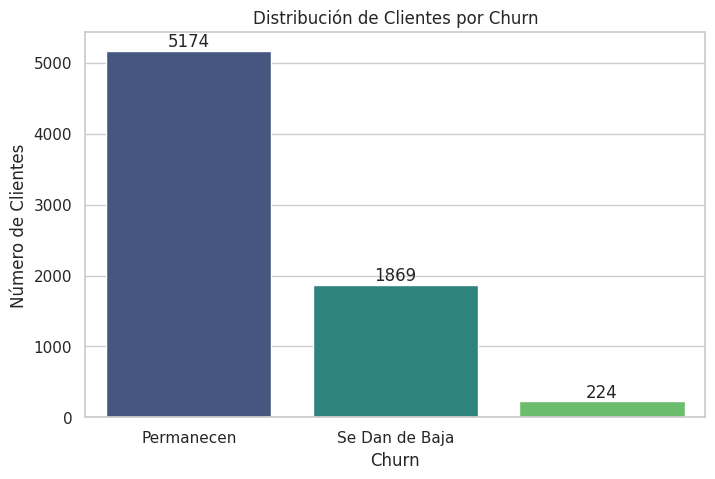

In [990]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de clientes que permanecieron y los que se dieron de baja
churn_counts = data['Churn'].value_counts()
# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')
# Agregar los valores en la parte superior de las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')
plt.title('Distribución de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Permanecen', 'Se Dan de Baja'])
plt.show()

## 10. Decidir la calificacion de los Churn con valores ''.

In [991]:
# Filtrar filas donde la columna 'Churn' es un espacio vacío
filas_vacias_churn = data[data['Churn'] == '']

# Supongamos que las columnas de servicios son 'Service1', 'Service2', 'Service3'
servicios = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']  # Reemplaza con los nombres reales de tus columnas


# Clasificar como 'Yes' si todos los servicios son 'No'
data.loc[(data['Churn'] == '') & (data[servicios].eq('No').all(axis=1)), 'Churn'] = 'Yes'

# Clasificar como 'No' si al menos un servicio es 'Yes'
data.loc[(data['Churn'] == '') & ~(data[servicios].eq('No').all(axis=1)), 'Churn'] = 'No'

# Verificar los cambios
print("Valores actualizados en 'Churn':")
print(data['Churn'].value_counts())




Valores actualizados en 'Churn':
Churn
No     5398
Yes    1869
Name: count, dtype: Int64


/tmp/ipython-input-992-742527853.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')


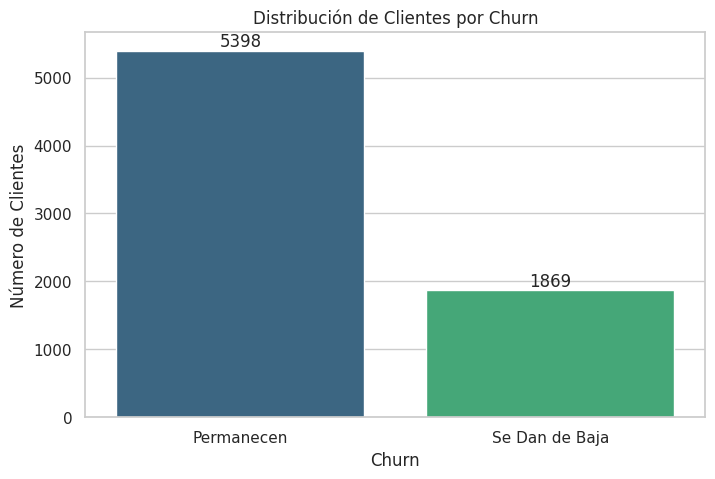

In [992]:
# Contar la cantidad de clientes que permanecieron y los que se dieron de baja
churn_counts = data['Churn'].value_counts()
# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')
# Agregar los valores en la parte superior de las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')
plt.title('Distribución de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['Permanecen', 'Se Dan de Baja'])
plt.show()

In [993]:
# Guardar el DataFrame como un archivo CSV
data.to_csv('TelecomX_Data_Modificado.csv', index=False)

# Guardar el DataFrame como un archivo JSON
data.to_json('TelecomX_Data_Modificado.json', orient='records', lines=True)

## 11. Recuento de evasión por variables categóricas

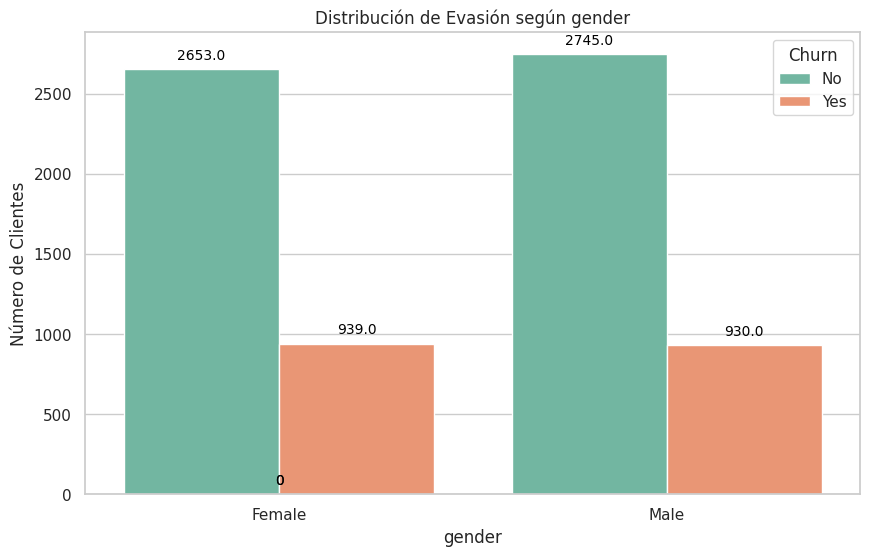

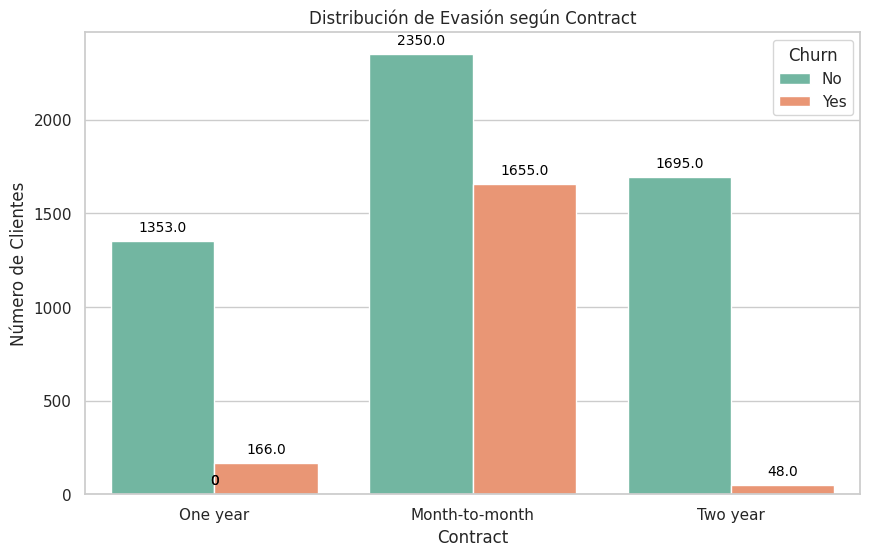

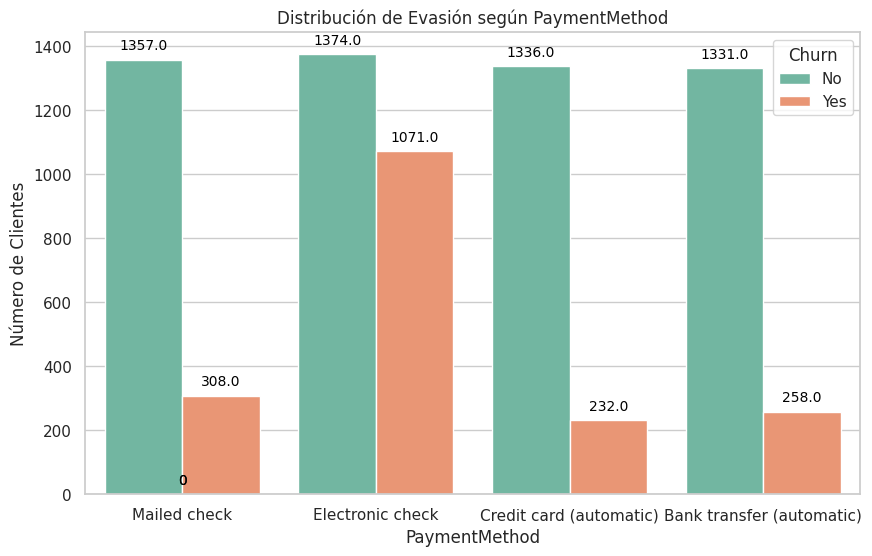

In [994]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las variables categóricas a analizar
variables_categoricas = ['gender', 'Contract', 'PaymentMethod']  # Reemplaza con los nombres reales de tus columnas

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")
# Crear gráficos de barras para cada variable categórica
for variable in variables_categoricas:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=data, x=variable, hue='Churn', palette='Set2')

    # Agregar los valores totales sobre las barras
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, color='black',
                    xytext=(0, 5),  # Desplazamiento vertical
                    textcoords='offset points')

    plt.title(f'Distribución de Evasión según {variable}')
    plt.xlabel(variable)
    plt.ylabel('Número de Clientes')
    plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
    plt.show()

## 12. Conteo de evasión por variables numéricas

/tmp/ipython-input-995-806644361.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Churn', y=variable, palette='Set2', inner='quartile')


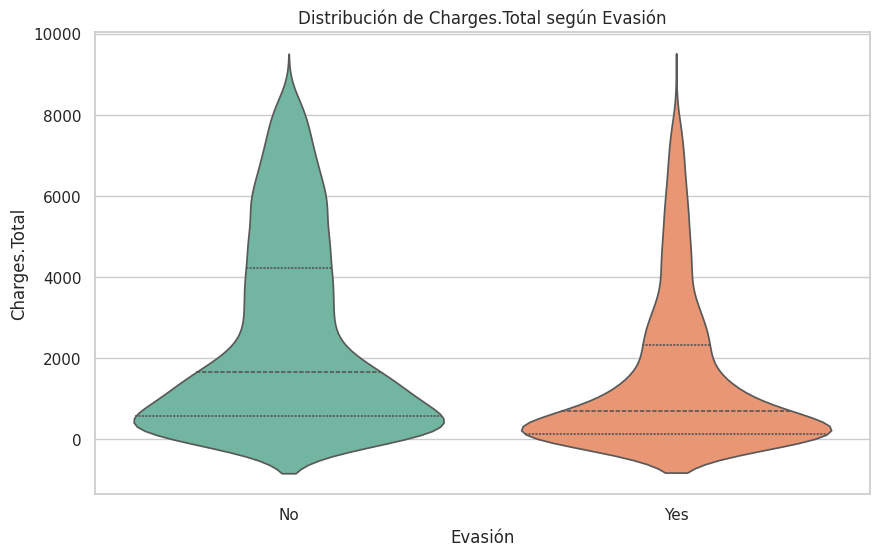

/tmp/ipython-input-995-806644361.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Churn', y=variable, palette='Set2', inner='quartile')


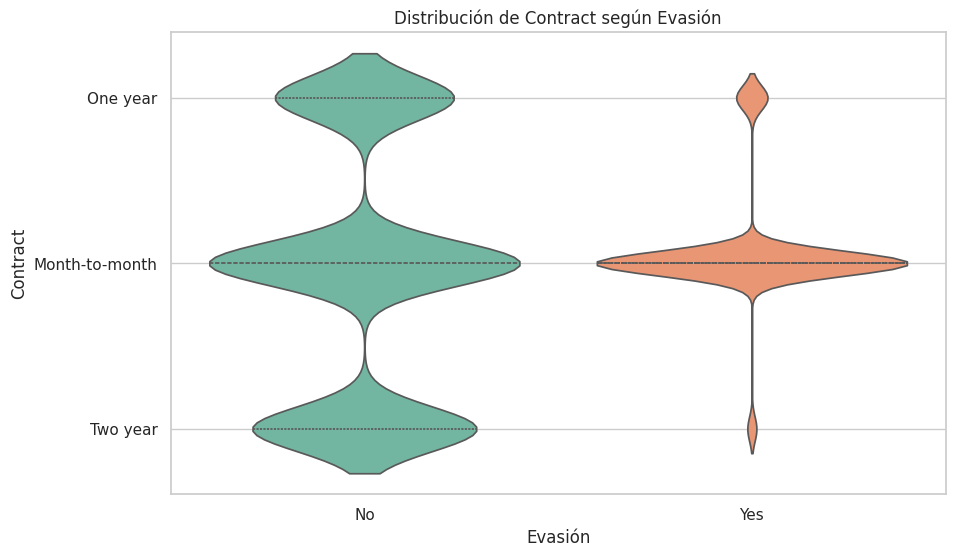

In [995]:
# Definir las variables numéricas a analizar
variables_numericas = ['Charges.Total', 'Contract']  # Reemplaza con los nombres reales de tus columnas

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear gráficos de violín para cada variable numérica
for variable in variables_numericas:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x='Churn', y=variable, palette='Set2', inner='quartile')

    plt.title(f'Distribución de {variable} según Evasión')
    plt.xlabel('Evasión')
    plt.ylabel(variable)
    plt.show()


## 13. Informe Final

Informe de Análisis de Evasión de Clientes (Churn)

Introducción

El objetivo de este análisis fue explorar el problema de la evasión de clientes (Churn) en una empresa de telecomunicaciones. La evasión de clientes se refiere a la pérdida de clientes que deciden cancelar sus servicios. Comprender los factores que influyen en la decisión de los clientes de cancelar sus servicios es crucial para implementar estrategias efectivas de retención. Este análisis se centra en identificar patrones en las características de los clientes que han cancelado sus servicios en comparación con aquellos que no lo han hecho.

Limpieza y Tratamiento de Datos
Pasos Realizados:
Importación de Datos: Se cargaron los datos desde un archivo JSON utilizando la biblioteca pandas.

Clasificación de Churn: Se clasificó la columna Churn para identificar a los clientes que han cancelado sus servicios. Se asignó el valor Yes a aquellos que cumplen con ciertas condiciones y No a los demás.

Limpieza de Datos: Se revisaron y limpiaron los datos, eliminando o imputando valores faltantes y asegurando que las columnas categóricas y numéricas estuvieran en el formato adecuado.

Análisis Exploratorio de Datos
Distribución de Evasión según Variables Categóricas
Se exploró la distribución de la evasión según variables categóricas como género, tipo de contrato y método de pago. A continuación, se presentan gráficos de barras que muestran la distribución de la evasión:

Distribución de Variables Numéricas
Se analizaron variables numéricas como "Total Gastado" y "Tiempo de Contrato" para observar su relación con la evasión. Se utilizaron gráficos de violín para visualizar estas distribuciones:


Conclusiones e Insights
Patrones en Variables Categóricas: Se observó que ciertos grupos demográficos, como el género y el tipo de contrato, tienen tasas de evasión significativamente diferentes. Por ejemplo, los clientes con contratos mensuales tienden a cancelar más que aquellos con contratos anuales.

Relación con Variables Numéricas: Los gráficos de violín mostraron que los clientes que cancelaron tienden a tener un total gastado más bajo y un tiempo de contrato más corto en comparación con los que no cancelaron.

Recomendaciones

Estrategias de Retención: Implementar programas de fidelización dirigidos a clientes con contratos mensuales, ofreciendo incentivos para que consideren la renovación de sus contratos.

Análisis de Precios: Revisar la estructura de precios y los servicios ofrecidos a los clientes que han gastado menos, para identificar oportunidades de mejora y retención.

Mejorar la Experiencia del Cliente: Realizar encuestas de satisfacción para entender mejor las razones detrás de la cancelación y mejorar la experiencia del cliente.

Segmentación de Clientes: Utilizar los hallazgos para segmentar a los clientes y personalizar las ofertas y comunicaciones, enfocándose en aquellos con mayor riesgo de evasión.

